# The Humble Perceptron

## History
---

In 1957, Frank Rosenblatt pioneered the first machine learning algorithm through the invention of the perceptron, modelled after biological neurons. Later unveiled to the public in 1958, the perceptron was touted as the next big thing with many believing that it would soon be able to "walk, talk, see, write, reproduce itself and be conscious of its existence"<sup>[1]</sup> (with some of the former only coming to fruition some 60 years later). The Navy claimed it was the first machine capable of "receiving, recognizing and identifying its surroundings witouth any human training or control"<sup>[1]</sup>, despite the overhyped expectations, the perceptron paved the way for the field of AI. However, rather unfortunately its shortcomings like its inability to learn patterns that were not linearly-sperable led AI research to stall for the coming decades, until the advent of the multilayer perceptron and backpropagation in the 1980s. 

<small>
[1]: <a href="nytimes.com/timesmachine/1958/07/08/83417341.html?pageNumber=25">“New Navy Device Learns By Doing,” New York Times, July 8 1958.</a>
</small>

## Math behind it
---

**Perceptron Model**

The perceptron is a binary classifier that maps an input vector $ \mathbf{X} $ to a binary output $ \hat{y} \in \{0, 1\} $. It uses a simple linear model followed by a step activation function, defined as follows: 

$$
z = \mathbf{W} \cdot \mathbf{X} + b 
$$

$$
\hat{y} = \mathrm{H}(z) = \mathrm{H}( \mathbf{W} \cdot \mathbf{X} + b  )

= 

\begin{cases}
    1, & \text{if  } \mathbf{W} \cdot \mathbf{X} + b  \ge 0, \\
    0, & \text{otherwise}
\end{cases}
$$

Where: 
- $ \mathbf{W} = [w_1, w_2, \dots, w_n] $: weights vector
- $ \mathbf{X} = [x_1, x_2, \dots, x_n] $: input vector (features)
- $ b $: bias term 
- $ \hat{y} $: predicted label (0 or 1)
- $ \mathrm{H}() $: [step activation function](../activation_functions/step/step.ipynb)

We can do a neat little simplification by absorbing the bias into weights by defining $ x_0 = 1 $, giving us: 

$$
\hat{y} = \mathrm{H}( \mathbf{W} \cdot \mathbf{X}) = \mathrm{H}( \sum_{i=0}^n w_i x_i )
$$

Where: 
- $ x_0 = 1 $
- $ w_0 = b $ 

<br><br>
**Activation Function**

The activation function is a Heaviside step function: 

$$
\mathrm{H}(z) = \begin{cases}
    1, & \text{if  } z  \ge 0, \\
    0, & \text{otherwise}
\end{cases}
$$
> For a more in-depth intuition I have implemented the step function [here](../activation_functions/step/step.ipynb)


<br><br>
**Perceptron Update Rule**

When training a perceptron we try to nudge the predicted label $ \hat{y} $ towards the actual label $ y $, by updating the weights as follows: 

$$
w_i \leftarrow w_i +  \eta \cdot (y - \hat{y}) \cdot x_i 
$$

Where: 
- $ \eta $: the learning rate


> note:  
> The error $ (y - \hat{y}) $ will resolve to one of 3 cases
> - 0: the perceptron correctly classifies the input, so do nothing
> - 1: the output is too low (0 when it should have been a 1), so increase weights in direction of input
> - -1: the output is too high (1 when it should have been a 0), so decrease weights in direction of input

## Code
---

In [103]:
class Perceptron: 
    def __init__(self):
        self.weights = []


    def train(self, X, Y, eta=0.01, epochs=100, verbose=0):
        self.weights = [0.0] * (len(X[0]) + 1) # intialize the weights with zeroes with size = num of features + bias

        for epoch in range(1, epochs + 1):

            # Loop through each vector x in the dataset 
            for x, y in zip(X, Y):
                y_pred = self.predict(x)
                error = y - y_pred
                
                x_with_bias = [1] + x   # add our bias term as x_0 = 1

                # Apply the perceptron update rule
                for i in range(len(self.weights)):
                    self.weights[i] += eta * error * x_with_bias[i]

            # Print training stats if verbose enabled
            if verbose != 0 and (epoch % verbose == 0 or epoch == 1 or epoch == epochs):
                correctly_predicted = sum(self.predict(x) == y for x, y in zip(X,Y))
                accuracy = correctly_predicted / len(Y) * 100
                weights = [round(w, 3) for w in self.weights]
                if len(weights) > 4:
                    weights = weights[:3] +  ['...', weights[-1]]
                print(f"Epoch: {epoch}/{epochs}, Accuracy: {accuracy:.2f}% ({correctly_predicted}/{len(Y)}), Weights: [{', '.join(map(str, weights))}]")


    def predict(self, x_new):
        x_new = [1] + x_new     # add our bias term as x_0 = 1
        z = sum( w_i * x_i for w_i, x_i in zip(self.weights, x_new))
        return self._step(z)
        

    def _step(self, z):
        return 1 if z >= 0 else 0
    
    

## Testing Model
---

### Imports

In [104]:
%pip install matplotlib scikit-learn pandas seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


### Test #1: Syntethic Dataset - AND Gate

======= Model Training =======
Epoch: 1/5, Accuracy: 25.00% (1/4), Weights: [0.0, 0.1, 0.1]
Epoch: 2/5, Accuracy: 50.00% (2/4), Weights: [-0.1, 0.2, 0.1]
Epoch: 3/5, Accuracy: 100.00% (4/4), Weights: [-0.2, 0.2, 0.1]
Epoch: 4/5, Accuracy: 100.00% (4/4), Weights: [-0.2, 0.2, 0.1]
Epoch: 5/5, Accuracy: 100.00% (4/4), Weights: [-0.2, 0.2, 0.1]

========== Testing ===========
Predictions on training data: 
	x = [0, 0] -> y = 0
	x = [0, 1] -> y = 0
	x = [1, 0] -> y = 0
	x = [1, 1] -> y = 1



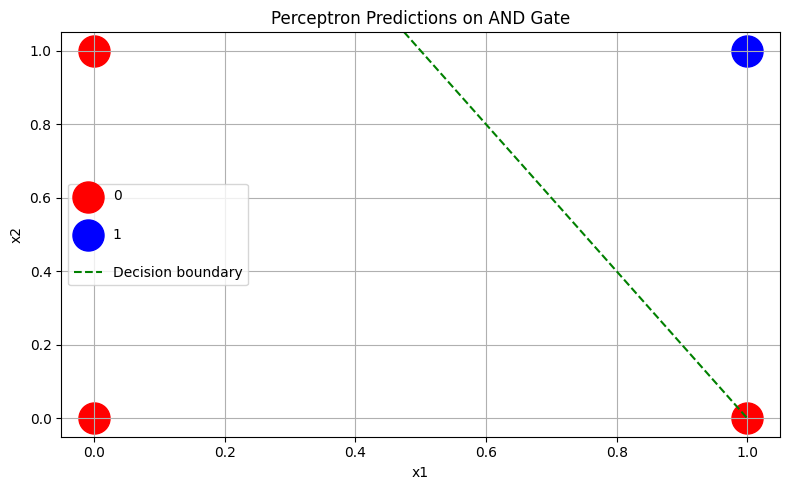

In [105]:
import matplotlib.pyplot as plt

# Sample data --> Truth table for AND gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]

# Train model
print(" Model Training ".center(30, "="))
model = Perceptron()
model.train(X, y, eta=0.1, epochs=5, verbose=1)


# Test Model on training data
print()
print(" Testing ".center(30, "="))
print("Predictions on training data: ")
for i in range(len(X)):
    x_val = X[i]
    y_pred =model.predict(x_val)
    print(f"\tx = {x_val} -> y = {y_pred}")



# Plot training data
print()
zeroes = [x_val for x_val, y_val in zip(X, y) if y_val == 0]
ones = [x_val for x_val, y_val in zip(X, y) if y_val == 1]

plt.figure(figsize=(8, 5))
plt.scatter([x[0] for x in zeroes], [x[1] for x in zeroes], color='red', label='0', s=500)
plt.scatter([x[0] for x in ones], [x[1] for x in ones], color='blue', label='1', s=500)


# plot decision boundary -> b + w1*x1 + w2*x2 = 0 therefore, x2 = -(b + w1*x1)/w2
b, w1, w2 = model.weights
x1_vals = [0, 1]
x2_vals = [-(b + w1*x1)/w2 for x1 in x1_vals]
plt.plot(x1_vals, x2_vals, color='green', linestyle='--', label="Decision boundary")

plt.title("Perceptron Predictions on AND Gate")
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend(labelspacing=1.75)
plt.tight_layout()
plt.show()




### Test #2: Syntethic Dataset - XOR Gate

======= Model Training =======
Epoch: 1/10, Accuracy: 50.00% (2/4), Weights: [-0.1, -0.1, 0.0]
Epoch: 2/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 3/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 4/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 5/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 6/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 7/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 8/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 9/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]
Epoch: 10/10, Accuracy: 50.00% (2/4), Weights: [0.0, -0.1, 0.0]

========== Testing ===========
Predictions on training data: 
	x = [0, 0] -> y = 1
	x = [0, 1] -> y = 1
	x = [1, 0] -> y = 0
	x = [1, 1] -> y = 0



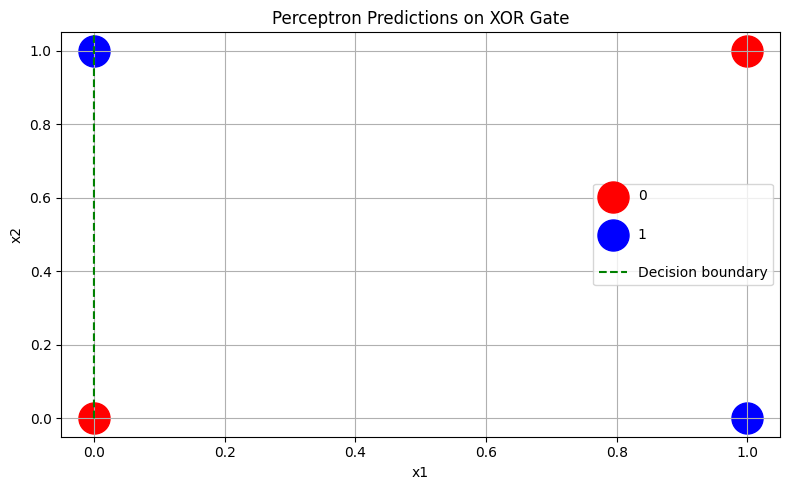

In [106]:
import matplotlib.pyplot as plt

# Sample data --> Truth table for XOR gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Train model
print(" Model Training ".center(30, "="))
model = Perceptron()
model.train(X, y, eta=0.1, epochs=10, verbose=1)


# Test Model on training data
print()
print(" Testing ".center(30, "="))
print("Predictions on training data: ")
for i in range(len(X)):
    x_val = X[i]
    y_pred =model.predict(x_val)
    print(f"\tx = {x_val} -> y = {y_pred}")



# Plot training data
print()
zeroes = [x_val for x_val, y_val in zip(X, y) if y_val == 0]
ones = [x_val for x_val, y_val in zip(X, y) if y_val == 1]

plt.figure(figsize=(8, 5))
plt.scatter([x[0] for x in zeroes], [x[1] for x in zeroes], color='red', label='0', s=500)
plt.scatter([x[0] for x in ones], [x[1] for x in ones], color='blue', label='1', s=500)


# plot decision boundary -> b + w1*x1 + w2*x2 = 0 therefore, x2 = -(b + w1*x1)/w2
b, w1, w2 = model.weights
w2 = 1e-6 if w2 == 0 else w2    # if w2 = 0, make it a small number approaching 0
x1_vals = [0, 1]
x2_vals = [-(b + w1*x1)/w2 for x1 in x1_vals]
plt.plot(x1_vals, x2_vals, color='green', linestyle='--', label="Decision boundary")


plt.title("Perceptron Predictions on XOR Gate")
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend(labelspacing=1.75)
plt.tight_layout()
plt.show()


This is the XOR problem that contributed to the first "AI winter" as it highlighted the limitations of the single-layer perceptron and its inability to classify non-linearly separable data. The solution to the XOR problem requires a multi-layer network with non-linear activation functions. 

### Test #3: Real Dataset - Breast Cancer

============ Data ============
     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]


======= Model Training =======
Epoch: 1/500, Accuracy: 45.49% (207/455), Weights: [5.4, 42.475, 81.003, ..., 0.365

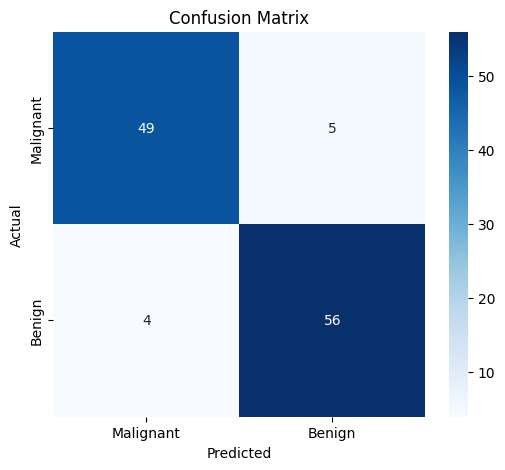

In [107]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns

# Load data
data = load_breast_cancer(as_frame=True)
df = data.frame


print(" Data ".center(30, "="))
print(f"{df}\n\n")
X = df[data.feature_names].to_numpy().tolist()    # 30 features
y = df['target'].to_numpy().tolist()              # 0 = malignant, 1 = benign


# Train/Test split --> 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=69)

# Train model
print(" Model Training ".center(30, "="))
model = Perceptron()
model.train(X_train, y_train, eta=0.1, epochs= 500, verbose=100)

# Predict
y_pred = [model.predict(x) for x in X_test]


# Output model stats
print() 
print(" Model Stats on Test Data ".center(30, "="))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)     # Of predicted "positives" how many were actually positive
recall = recall_score(y_test, y_pred)           # Of all actual positives how many did we correctly identify
f1 = f1_score(y_test, y_pred)                   # Harmonic mean of precision and recall, penalizing low values in either metrics  --> score: (perfect = 1, worst = 0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Plot confusion matrix
print()
print(" Confusion Matrix ".center(30, "="))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
